In [1]:
import os
import pyciemss
import torch
import pandas as pd
import numpy as np
from typing import Dict, List, Callable

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

from pyciemss.integration_utils.intervention_builder import (
    param_value_objective,
    start_time_objective,
)

smoke_test = ('CI' in os.environ)

In [2]:
MODEL_PATH = "https://raw.githubusercontent.com/gyorilab/mira/752a9caa838234c8ded29bb25f54d007cc73faf2/notebooks/evaluation_2024.03/epi_scenario3/SEIR_scenario3_petrinet.json"
DATA_PATH = "https://raw.githubusercontent.com/ciemss/program-milestones/sa-eval-scenario-3/18-month-milestone/evaluation/Epi_Use_Case/averaged_data.csv"



In [3]:
end_time = 150.0
logging_step_size = 1.0
num_samples = 100
num_iterations = 10 

## Question 3

In [4]:
result = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples)

In [5]:
#display(result['data'])
DATA = pd.read_csv(DATA_PATH)

#rename first column in DATA to "Timestamp"
DATA.columns = ['Timestamp'] + list(DATA.columns[1:])

DATA = DATA.drop(columns=['run'])

#drop first row
DATA = DATA.drop(0)

PERIOD_1 = DATA[DATA['Timestamp'] <= 20]

display(PERIOD_1)

#dump data to csv
DATA.to_csv('data.csv', index=False)
PERIOD_1.to_csv('period_1.csv', index=False)

,Timestamp,S1,S2,S3,E1,E2,E3,I1,I2,I3,R1,R2,R3
1,1,1.030555e+07,1.528175e+07,1.215437e+07,151.794655,191.093779,117.866751,54.941877,56.474173,53.622694,3.109141,3.139898,3.082692
2,2,1.030542e+07,1.528158e+07,1.215428e+07,265.434124,348.890643,192.267918,67.851795,74.023679,62.493990,6.751479,6.997135,6.539158
3,3,1.030525e+07,1.528134e+07,1.215417e+07,408.748897,548.398327,283.652306,89.876683,104.270136,77.221285,11.432738,12.275393,10.698553
4,4,1.030502e+07,1.528102e+07,1.215402e+07,602.298709,818.417850,403.948286,123.568640,150.803945,99.234839,17.768941,19.833785,15.950812
5,5,1.030469e+07,1.528056e+07,1.215382e+07,872.518698,1195.937454,568.347068,173.136310,219.533582,130.923536,26.577081,30.813815,22.799430
6,6,1.030422e+07,1.527991e+07,1.215354e+07,1255.452081,1731.340828,797.409614,244.945417,319.382809,175.911931,38.988190,46.797501,31.926528
7,7,1.030355e+07,1.527898e+07,1.215314e+07,1801.627404,2495.207550,1119.810880,348.321181,463.408976,239.507686,56.599139,70.019486,44.279466
8,8,1.030260e+07,1.527764e+07,1.215258e+07,2582.755648,3587.646756,1576.100818,496.748783,670.476206,329.372924,81.683897,103.661998,61.190656
9,9,1.030123e+07,1.527573e+07,1.215178e+07,3701.143892,5151.413459,2223.986274,709.624122,967.695366,456.504595,117.492442,152.271990,84.546445
10,10,1.029927e+07,1.527300e+07,1.215064e+07,5303.052460,7390.517288,3145.824923,1014.778363,1393.942082,636.649072,168.676517,222.355043,117.027047


In [6]:
data_mapping = {"S1": "S_y", "S2": "S_m", "S3": "S_o",
                "R1": "R_y", "R2": "R_m", "R3": "R_o",
                "E1": "E_y", "E2": "E_m", "E3": "E_o",
                "I1": "I_y", "I2": "I_m", "I3": "I_o",}

calibrated_results = pyciemss.calibrate(MODEL_PATH, "period_1.csv", data_mapping=data_mapping, num_iterations = num_iterations)

/home/rafal/s78projects/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data_df.applymap(lambda x: isinstance(x, (int, float))).all().all():


Data printout: This dataset contains 19 rows of data. The first column, Timestamp, begins at 1 and ends at 20. The subsequent columns are named: S1, S2, S3, E1, E2, E3, I1, I2, I3, R1, R2, R3


In [7]:
calibrated_period_1_sample = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples, inferred_parameters=calibrated_results['inferred_parameters'])

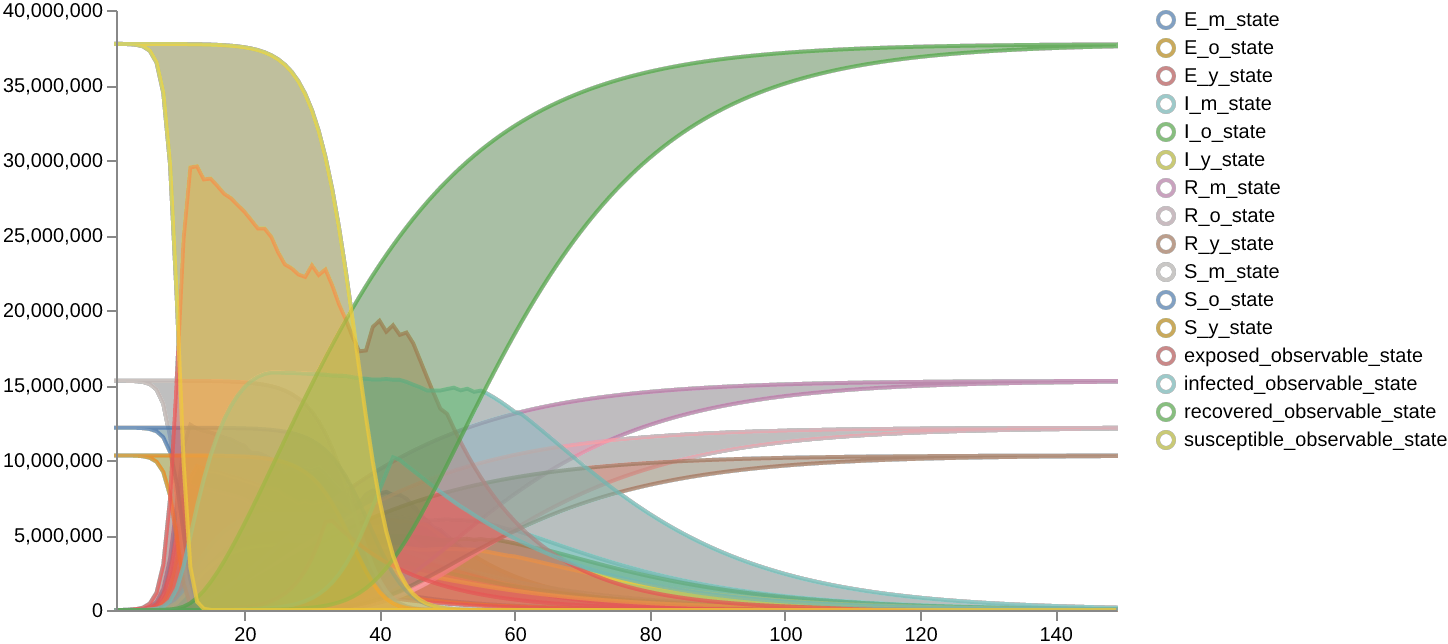

In [8]:
# Plot the original model
schema = plots.trajectories(result["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

In [9]:
display(calibrated_period_1_sample["data"].tail(10))

,timepoint_id,sample_id,timepoint_unknown,persistent_Myy_param,persistent_beta_param,persistent_mcw_param,persistent_mew_param,persistent_Mym_param,persistent_Myo_param,persistent_Mmy_param,...,R_m_state,R_o_state,R_y_state,S_m_state,S_o_state,S_y_state,susceptible_observable_state,exposed_observable_state,infected_observable_state,recovered_observable_state
14890,139,99,140.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15251078.0,12128166.0,10285010.0,5.860412e-29,7.158418e-25,2.124918e-29,7.159217e-25,1711.730713,76366.234375,37664256.0
14891,140,99,141.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15252821.0,12129667.0,10286190.0,5.769017e-29,7.087673e-25,2.091906e-29,7.088459e-25,1580.126465,72046.710938,37668680.0
14892,141,99,142.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15254509.0,12131095.0,10287315.0,5.684094e-29,7.021569e-25,2.061236e-29,7.022344e-25,1458.640869,67968.937500,37672920.0
14893,142,99,143.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15256056.0,12132420.0,10288359.0,5.605139e-29,6.959777e-25,2.032710e-29,6.960541e-25,1346.494873,64119.507812,37676836.0
14894,143,99,144.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15257552.0,12133677.0,10289362.0,5.531654e-29,6.901980e-25,2.006163e-29,6.902734e-25,1242.970703,60485.929688,37680592.0
14895,144,99,145.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15258934.0,12134874.0,10290288.0,5.463224e-29,6.847902e-25,1.981442e-29,6.848646e-25,1147.407227,57056.203125,37684096.0
14896,145,99,146.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15260251.0,12136001.0,10291160.0,5.399458e-29,6.797278e-25,1.958401e-29,6.798014e-25,1059.190430,53819.101562,37687412.0
14897,146,99,147.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15261496.0,12137057.0,10292007.0,5.339975e-29,6.749868e-25,1.936914e-29,6.750596e-25,977.755981,50763.925781,37690560.0
14898,147,99,148.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15262682.0,12138061.0,10292798.0,5.284483e-29,6.705447e-25,1.916864e-29,6.706168e-25,902.582642,47880.597656,37693544.0
14899,148,99,149.0,38.741631,0.387671,0.033712,0.045018,20.665417,6.176402,20.632872,...,15263775.0,12138998.0,10293535.0,5.232666e-29,6.663832e-25,1.898141e-29,6.664545e-25,833.188660,45159.570312,37696308.0


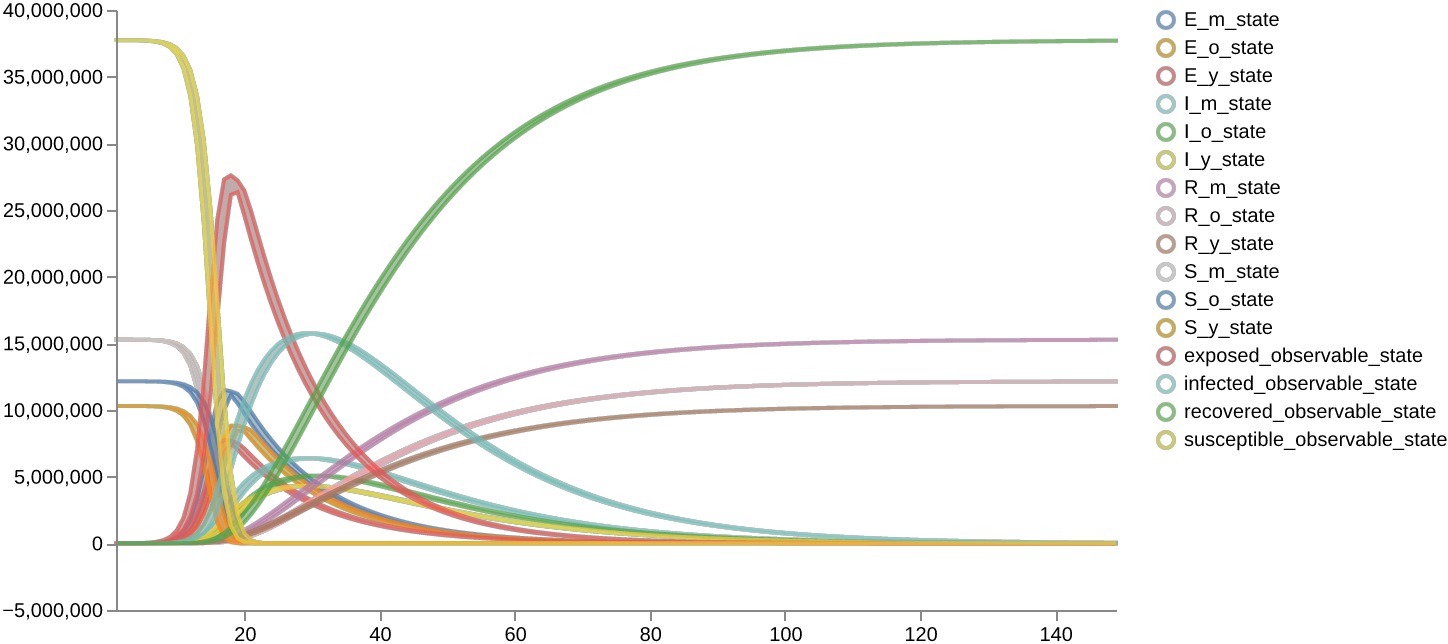

In [10]:
# Plot from the posterior sample
schema_posterior = plots.trajectories(calibrated_period_1_sample["data"], keep=".*_state")
plots.save_schema(schema_posterior, "_schema_posterior.json")
plots.ipy_display(schema_posterior, dpi=150)

In [53]:
max(calibrated_period_1_sample["data"]['I_m_state'])

6389426.0

In [11]:
calibrated_period_1_sample['data'].keys()

contact_params = [key[11:14] for key in calibrated_period_1_sample['data'].keys() if key.startswith('persistent_M')]

print(contact_params)

static_interventions_social = {
    torch.tensor(20.0): {param: lambda x: x * .3 for param in contact_params},
    torch.tensor(80.0): {param: lambda x: x * .8/.3 for param in contact_params},
}

['Myy', 'Mym', 'Myo', 'Mmy', 'Mmm', 'Mmo', 'Moy', 'Mom', 'Moo']


In [12]:
social_policy_sample = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples, inferred_parameters=calibrated_results['inferred_parameters'], 
                                       static_parameter_interventions=static_interventions_social)

In [13]:
sps = social_policy_sample['data']
sps_df = sps[sps['sample_id'] == 0]
display(sps_df)

,timepoint_id,sample_id,timepoint_unknown,persistent_Myy_param,persistent_beta_param,persistent_mcw_param,persistent_mew_param,persistent_Mym_param,persistent_Myo_param,persistent_Mmy_param,...,R_m_state,R_o_state,R_y_state,S_m_state,S_o_state,S_y_state,susceptible_observable_state,exposed_observable_state,infected_observable_state,recovered_observable_state
0,0,0,1.0,38.733910,0.371485,0.033197,0.04449,20.658703,6.173417,20.633942,...,3.390092e+00,3.206655e+00,3.291486e+00,1.528139e+07,1.215419e+07,1.030530e+07,3.774088e+07,1215.229492,193.255768,9.888232e+00
1,1,0,2.0,38.733910,0.371485,0.033197,0.04449,20.658703,6.173417,20.633942,...,9.166057e+00,7.597121e+00,8.328606e+00,1.528060e+07,1.215382e+07,1.030472e+07,3.773914e+07,2806.255127,333.182983,2.509178e+01
2,2,0,3.0,38.733910,0.371485,0.033197,0.04449,20.658703,6.173417,20.633942,...,2.073851e+01,1.473502e+01,1.756756e+01,1.527909e+07,1.215315e+07,1.030363e+07,3.773588e+07,5733.220215,634.192078,5.304109e+01
3,3,0,4.0,38.733910,0.371485,0.033197,0.04449,20.658703,6.173417,20.633942,...,4.437070e+01,2.735609e+01,3.549764e+01,1.527613e+07,1.215188e+07,1.030151e+07,3.772952e+07,11443.119141,1241.435425,1.072244e+02
4,4,0,5.0,38.733910,0.371485,0.033197,0.04449,20.658703,6.173417,20.633942,...,9.232395e+01,5.065734e+01,7.089113e+01,1.527022e+07,1.214940e+07,1.029728e+07,3.771690e+07,22740.246094,2450.953125,2.138724e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,0,145.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,1.525841e+07,1.213434e+07,1.028995e+07,3.838330e-14,2.962697e-06,1.926604e-14,2.962697e-06,1185.663574,58418.691406,3.768270e+07
145,145,0,146.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,1.525977e+07,1.213548e+07,1.029085e+07,3.803145e-14,2.945467e-06,1.909019e-14,2.945467e-06,1094.505371,55105.101562,3.768610e+07
146,146,0,147.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,1.526102e+07,1.213658e+07,1.029171e+07,3.770260e-14,2.929317e-06,1.892584e-14,2.929317e-06,1010.355835,51977.656250,3.768932e+07
147,147,0,148.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,1.526220e+07,1.213762e+07,1.029252e+07,3.739499e-14,2.914156e-06,1.877212e-14,2.914156e-06,932.675781,49026.054688,3.769234e+07


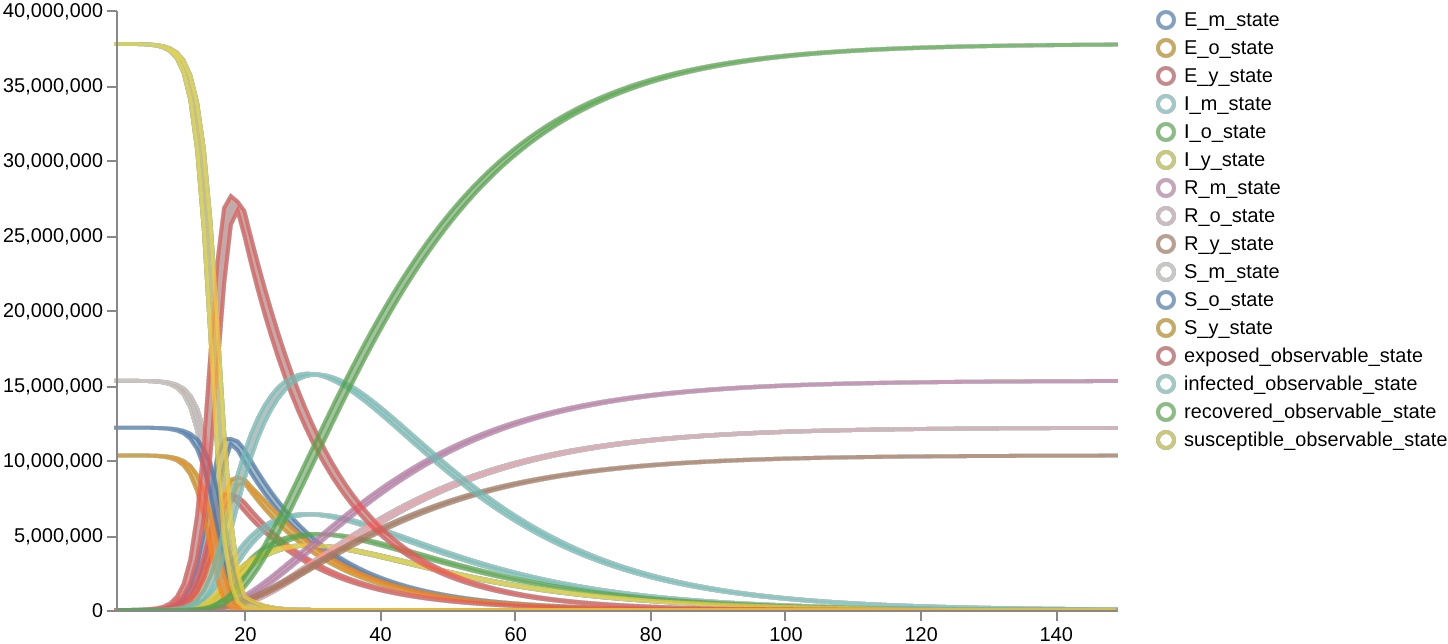

In [14]:
# Plot from the posterior sample
schema_sp = plots.trajectories(social_policy_sample["data"], keep=".*_state")
plots.save_schema(schema_sp, "_schema_posterior.json")
plots.ipy_display(schema_sp, dpi=150)

In [15]:
display(sps_df.tail(10))

,timepoint_id,sample_id,timepoint_unknown,persistent_Myy_param,persistent_beta_param,persistent_mcw_param,persistent_mew_param,persistent_Mym_param,persistent_Myo_param,persistent_Mmy_param,...,R_m_state,R_o_state,R_y_state,S_m_state,S_o_state,S_y_state,susceptible_observable_state,exposed_observable_state,infected_observable_state,recovered_observable_state
139,139,0,140.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15250329.0,12127456.0,10284549.0,4.055486e-14,0.000003,2.035118e-14,0.000003,1768.799805,78183.664062,37662332.0
140,140,0,141.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15252158.0,12128993.0,10285765.0,4.005806e-14,0.000003,2.010294e-14,0.000003,1632.810059,73762.562500,37666916.0
141,141,0,142.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15253895.0,12130450.0,10286913.0,3.959494e-14,0.000003,1.987156e-14,0.000003,1507.274292,69588.820312,37671256.0
142,142,0,143.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15255463.0,12131826.0,10287979.0,3.916300e-14,0.000003,1.965568e-14,0.000003,1391.389038,65648.648438,37675268.0
143,143,0,144.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15256983.0,12133133.0,10289003.0,3.875975e-14,0.000003,1.945420e-14,0.000003,1284.414673,61929.371094,37679120.0
144,144,0,145.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15258406.0,12134340.0,10289953.0,3.838330e-14,0.000003,1.926604e-14,0.000003,1185.663574,58418.691406,37682700.0
145,145,0,146.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15259770.0,12135479.0,10290854.0,3.803145e-14,0.000003,1.909019e-14,0.000003,1094.505371,55105.101562,37686104.0
146,146,0,147.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15261022.0,12136584.0,10291710.0,3.770260e-14,0.000003,1.892584e-14,0.000003,1010.355835,51977.656250,37689316.0
147,147,0,148.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15262196.0,12137623.0,10292516.0,3.739499e-14,0.000003,1.877212e-14,0.000003,932.675781,49026.054688,37692336.0
148,148,0,149.0,30.987127,0.371485,0.033197,0.04449,16.526964,4.938734,16.507153,...,15263351.0,12138580.0,10293271.0,3.710714e-14,0.000003,1.862823e-14,0.000003,860.968445,46240.601562,37695204.0


100
50    1.382599e+07
dtype: float64


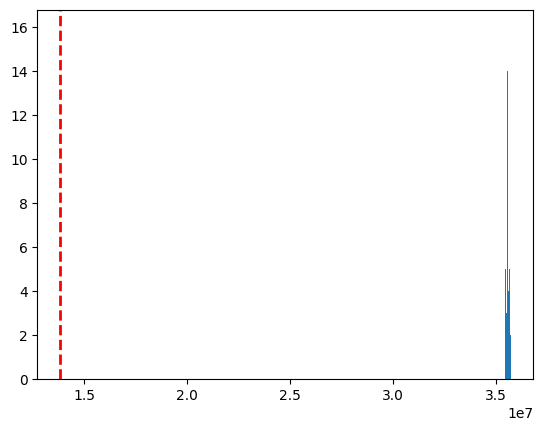

In [16]:
calibrated_period_1_sample['data'].keys()


OOI_unintervened = (calibrated_period_1_sample['data']['infected_observable_state'][
    calibrated_period_1_sample['data']['timepoint_id'] == 50.0] 
    + 
    calibrated_period_1_sample['data']['recovered_observable_state'][   
    calibrated_period_1_sample['data']['timepoint_id'] == 50.0] 
)
print(len(OOI_unintervened))

OOI_data_50 = (DATA[DATA['Timestamp'] == 50.0]['I1']+
    DATA[DATA['Timestamp'] == 50.0]['I2']+
    DATA[DATA['Timestamp'] == 50.0]['I3']+
    DATA[DATA['Timestamp'] == 50.0]['R1'] +
    DATA[DATA['Timestamp'] == 50.0]['R2'] +
    DATA[DATA['Timestamp'] == 50.0]['R3'])
 
print(OOI_data_50)

DIFS = OOI_unintervened - OOI_data_50


import matplotlib.pyplot as plt

plt.hist(OOI_unintervened, bins=20)
# add vertical line at  OOI_data_50
plt.axvline(x=OOI_data_50.item(), color='r', linestyle='dashed', linewidth=2)
#plt.title(f"mean: {DIFS.mean()}, std: {DIFS.std()}")
plt.show()

In [17]:
# static_interventions_social = {
#     torch.tensor(20.0): {param: lambda x: x * .3 for param in contact_params},
#     torch.tensor(80.0): {param: lambda x: x * .8/.3 for param in contact_params},
# }

PERIOD_2 = DATA[DATA['Timestamp'] <= 50]
PERIOD_2.to_csv('period_2.csv', index=False)

display(PERIOD_2)

,Timestamp,S1,S2,S3,E1,E2,E3,I1,I2,I3,R1,R2,R3
1,1,1.030555e+07,1.528175e+07,1.215437e+07,1.517947e+02,1.910938e+02,1.178668e+02,5.494188e+01,5.647417e+01,5.362269e+01,3.109141e+00,3.139898e+00,3.082692e+00
2,2,1.030542e+07,1.528158e+07,1.215428e+07,2.654341e+02,3.488906e+02,1.922679e+02,6.785180e+01,7.402368e+01,6.249399e+01,6.751479e+00,6.997135e+00,6.539158e+00
3,3,1.030525e+07,1.528134e+07,1.215417e+07,4.087489e+02,5.483983e+02,2.836523e+02,8.987668e+01,1.042701e+02,7.722129e+01,1.143274e+01,1.227539e+01,1.069855e+01
4,4,1.030502e+07,1.528102e+07,1.215402e+07,6.022987e+02,8.184178e+02,4.039483e+02,1.235686e+02,1.508039e+02,9.923484e+01,1.776894e+01,1.983378e+01,1.595081e+01
5,5,1.030469e+07,1.528056e+07,1.215382e+07,8.725187e+02,1.195937e+03,5.683471e+02,1.731363e+02,2.195336e+02,1.309235e+02,2.657708e+01,3.081381e+01,2.279943e+01
6,6,1.030422e+07,1.527991e+07,1.215354e+07,1.255452e+03,1.731341e+03,7.974096e+02,2.449454e+02,3.193828e+02,1.759119e+02,3.898819e+01,4.679750e+01,3.192653e+01
7,7,1.030355e+07,1.527898e+07,1.215314e+07,1.801627e+03,2.495208e+03,1.119811e+03,3.483212e+02,4.634090e+02,2.395077e+02,5.659914e+01,7.001949e+01,4.427947e+01
8,8,1.030260e+07,1.527764e+07,1.215258e+07,2.582756e+03,3.587647e+03,1.576101e+03,4.967488e+02,6.704762e+02,3.293729e+02,8.168390e+01,1.036620e+02,6.119066e+01
9,9,1.030123e+07,1.527573e+07,1.215178e+07,3.701144e+03,5.151413e+03,2.223986e+03,7.096241e+02,9.676954e+02,4.565046e+02,1.174924e+02,1.522720e+02,8.454645e+01
10,10,1.029927e+07,1.527300e+07,1.215064e+07,5.303052e+03,7.390517e+03,3.145825e+03,1.014778e+03,1.393942e+03,6.366491e+02,1.686765e+02,2.223550e+02,1.170270e+02


In [ ]:
# stopped calibrating due to numerical issues; there is more than enough data and no uncertainty results
# will re-use the previously calibrated model

# calibrated_period_2_results = pyciemss.calibrate(MODEL_PATH, "period_2.csv", data_mapping=data_mapping, num_iterations = num_iterations,
#                                                  static_parameter_interventions=static_interventions_social,
#                                                  noise_model_kwargs={'scale': 0.6})

In [18]:
calibrated_period_2_sample = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples, inferred_parameters=calibrated_results['inferred_parameters'],
                                             static_parameter_interventions=static_interventions_social)

100
80    3.422374e+07
dtype: float64


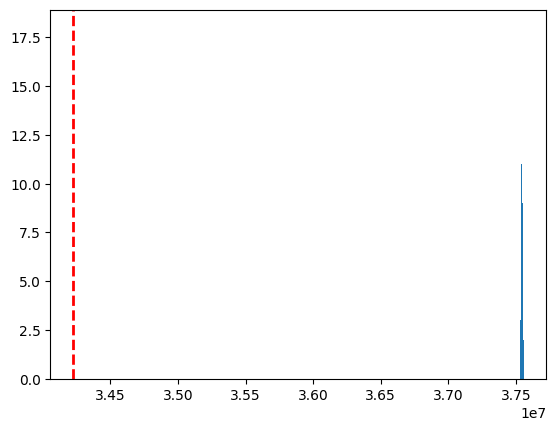

In [19]:

OOI_period_2 = (calibrated_period_2_sample['data']['infected_observable_state'][
    calibrated_period_2_sample['data']['timepoint_id'] == 80.0] 
    + 
    calibrated_period_2_sample['data']['recovered_observable_state'][   
    calibrated_period_2_sample['data']['timepoint_id'] == 80.0] 
)
print(len(OOI_period_2))

OOI_data_80 = (DATA[DATA['Timestamp'] == 80.0]['I1']+
    DATA[DATA['Timestamp'] == 80.0]['I2']+
    DATA[DATA['Timestamp'] == 80.0]['I3']+
    DATA[DATA['Timestamp'] == 80.0]['R1'] +
    DATA[DATA['Timestamp'] == 80.0]['R2'] +
    DATA[DATA['Timestamp'] == 80.0]['R3'])
 
print(OOI_data_80)


plt.hist(OOI_period_2, bins=20)
plt.axvline(x=OOI_data_80.item(), color='r', linestyle='dashed', linewidth=2)
plt.show()

In [20]:

static_interventions_masking = {
    torch.tensor(50.0): {"mcw": torch.tensor(.5),
                         "mew": torch.tensor(.6),},
    torch.tensor(100.0): {"mcw": torch.tensor(.4),
                          "mew": torch.tensor(.2),},

}

static_parameter_interventions = {**static_interventions_social, **static_interventions_masking}

PERIOD_3 = DATA[DATA['Timestamp'] <= 80]
PERIOD_3.to_csv('period_3.csv', index=False)


In [ ]:


# calibrated_period_3_results = pyciemss.calibrate(MODEL_PATH, "period_3.csv", data_mapping=data_mapping, 
#                                                 num_iterations = num_iterations,
#                                                 static_parameter_interventions=static_parameter_interventions,
#                                                 noise_model_kwargs={'scale': 0.8})

In [21]:
static_interventions_social_control = {
    torch.tensor(20.0): {param: lambda x: x * .3 for param in contact_params},
}

static_parameter_interventions_period_3 = {**static_interventions_social_control,
                                            **static_interventions_masking}


calibrated_period_3_sample = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples,
                         inferred_parameters=calibrated_results['inferred_parameters'],
                            static_parameter_interventions=static_parameter_interventions_period_3)
                                             

100
100    3.698299e+07
dtype: float64


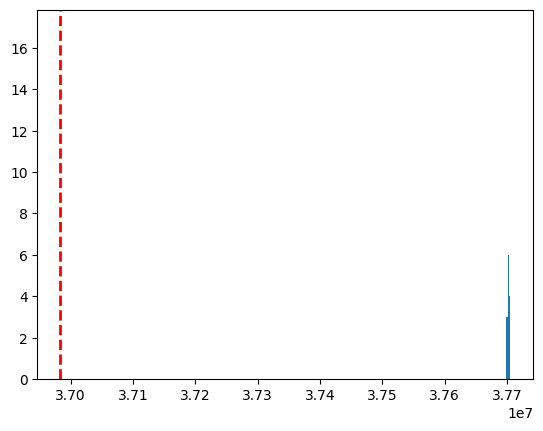

In [22]:
OOI_period_3 = (calibrated_period_3_sample['data']['infected_observable_state'][
    calibrated_period_3_sample['data']['timepoint_id'] == 100.0] 
    + 
    calibrated_period_3_sample['data']['recovered_observable_state'][   
    calibrated_period_3_sample['data']['timepoint_id'] == 100.0] 
)
print(len(OOI_period_3))

OOI_data_100 = (DATA[DATA['Timestamp'] == 100.0]['I1']+
    DATA[DATA['Timestamp'] == 100.0]['I2']+
    DATA[DATA['Timestamp'] == 100.0]['I3']+
    DATA[DATA['Timestamp'] == 100.0]['R1'] +
    DATA[DATA['Timestamp'] == 100.0]['R2'] +
    DATA[DATA['Timestamp'] == 100.0]['R3'])
 
print(OOI_data_100)


plt.hist(OOI_period_3, bins=20)
plt.axvline(x=OOI_data_100.item(), color='r', linestyle='dashed', linewidth=2)
plt.show()

# We would expect to see the baseline to be somewhat below the data here
# as we're effectively weaking the social distancing policy in this period
# the difference between baseline and the observed values, is relatively small

# Alternatively, a more systematic way would be to compare two simulation runs
# with and without an intervention, and then compare the difference in the OOI

# there are more periods, but we will stop here and move on to other tasks

## Question 4


In [23]:
print(static_interventions_social)



{tensor(20.): {'Myy': <function <lambda> at 0x77f93bf31080>, 'Mym': <function <lambda> at 0x77f93bf30b80>, 'Myo': <function <lambda> at 0x77f93bf30cc0>, 'Mmy': <function <lambda> at 0x77f93bf30ea0>, 'Mmm': <function <lambda> at 0x77f93bf31260>, 'Mmo': <function <lambda> at 0x77f93bf313a0>, 'Moy': <function <lambda> at 0x77f93bf31300>, 'Mom': <function <lambda> at 0x77f93bf31da0>, 'Moo': <function <lambda> at 0x77f93bf31800>}, tensor(80.): {'Myy': <function <lambda> at 0x77f93bf31b20>, 'Mym': <function <lambda> at 0x77f93bf31bc0>, 'Myo': <function <lambda> at 0x77f93bf314e0>, 'Mmy': <function <lambda> at 0x77f93bf323e0>, 'Mmm': <function <lambda> at 0x77f93bf31120>, 'Mmo': <function <lambda> at 0x77f93bf327a0>, 'Moy': <function <lambda> at 0x77f93bf30a40>, 'Mom': <function <lambda> at 0x77f93bf311c0>, 'Moo': <function <lambda> at 0x77f93bf31ee0>}}


In [24]:
static_interventions_social_perturbed40 = static_interventions_social.copy()
static_interventions_social_perturbed20 = static_interventions_social.copy()
static_interventions_social_perturbed40[torch.tensor(20.0)] = {
    param: lambda x: x * .4 for param in contact_params}
static_interventions_social_perturbed20[torch.tensor(20.0)] = {
    param: lambda x: x * .2 for param in contact_params}

In [26]:
calibrated_period_2_perturbed40_sample = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples, inferred_parameters=calibrated_results['inferred_parameters'],
                                             static_parameter_interventions=static_interventions_social_perturbed40)

In [28]:
calibrated_period_2_perturbed20_sample = pyciemss.sample(MODEL_PATH, end_time, logging_step_size, num_samples, inferred_parameters=calibrated_results['inferred_parameters'],
                                             static_parameter_interventions=static_interventions_social_perturbed20)

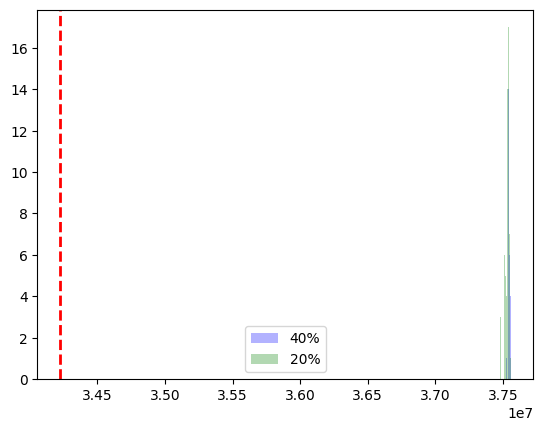

In [33]:

OOI_period_2_p40 = (calibrated_period_2_perturbed40_sample['data']['infected_observable_state'][
    calibrated_period_2_perturbed40_sample['data']['timepoint_id'] == 80.0] 
    + 
    calibrated_period_2_perturbed40_sample['data']['recovered_observable_state'][   
    calibrated_period_2_perturbed40_sample['data']['timepoint_id'] == 80.0] 
)

OOI_period_2_p20 = (calibrated_period_2_perturbed20_sample['data']['infected_observable_state'][
    calibrated_period_2_perturbed20_sample['data']['timepoint_id'] == 80.0] 
    + 
    calibrated_period_2_perturbed20_sample['data']['recovered_observable_state'][   
    calibrated_period_2_perturbed20_sample['data']['timepoint_id'] == 80.0] 
)


plt.hist(OOI_period_2_p40, bins=20, color = "blue", label="40%", alpha = .3)
plt.hist(OOI_period_2_p20, bins=20, color = "green", label="20%", alpha = .3)
plt.axvline(x=OOI_data_80.item(), color='r', linestyle='dashed', linewidth=2)
plt.legend()
#plt.xlim(3.7e7,3.8e7)
plt.show()

# There seems to be no significant difference between the two perturbations

## Question 5


In [34]:
from pyciemss.ouu.qoi import obs_max_qoi, param_value_objective

In [54]:
observed_params = ["I_m_state"]
# moved intervention time to precede the peak
intervention_time = [torch.tensor(15.0), torch.tensor(15.0)]
intervened_params = ["mew", "mcw"]

initial_guess_interventions = [0.6, 0.5]
bounds_interventions = [[0.1, 0.5], [.95, 0.52]]

static_parameter_interventions = param_value_objective(
    param_name = intervened_params,
    start_time = intervention_time,
)

In [55]:
risk_bound = 5e6

# risk bound changed
# the original value of 5e6 was unrealistic
# in light of the unintervened maximum value of ca. 16e6

qoi = lambda x: obs_max_qoi(x, observed_params)
objfun = lambda x: x[0]

In [56]:
opt_result = pyciemss.optimize(
    MODEL_PATH,
    end_time,
    logging_step_size,
    qoi,
    risk_bound,
    static_parameter_interventions,
    objfun,
    initial_guess_interventions=initial_guess_interventions,
    bounds_interventions=bounds_interventions,
    start_time=0.0,
    n_samples_ouu=int(1e2),
    maxiter=0,
    maxfeval=20,
    alpha = 0.9,
    #solver_method="dk5",
)
print(f'Optimal policy:', opt_result["policy"])
print(opt_result)




/home/rafal/s78projects/pyciemss/pyciemss/ouu/ouu.py:100: UserWarning: Selected interventions are out of bounds. Will use a penalty instead of estimating risk.
  warnings.warn(
/home/rafal/s78projects/pyciemss/pyciemss/ouu/ouu.py:100: UserWarning: Selected interventions are out of bounds. Will use a penalty instead of estimating risk.
  warnings.warn(
/home/rafal/s78projects/pyciemss/pyciemss/ouu/ouu.py:100: UserWarning: Selected interventions are out of bounds. Will use a penalty instead of estimating risk.
  warnings.warn(


/home/rafal/s78projects/pyciemss/pyciemss/ouu/ouu.py:100: UserWarning: Selected interventions are out of bounds. Will use a penalty instead of estimating risk.
  warnings.warn(












21it [04:32, 12.99s/it]                        

Optimal policy: tensor([0.5704, 0.5073], dtype=torch.float64)
{'policy': tensor([0.5704, 0.5073], dtype=torch.float64), 'OptResults':                     message: ['requested number of basinhopping iterations completed successfully']
                    success: False
                        fun: 0.5703158108240574
                          x: [ 5.704e-01  5.073e-01]
                        nit: 1
      minimization_failures: 1
                       nfev: 20
 lowest_optimization_result: message: Did not converge to a solution satisfying the constraints. See `maxcv` for magnitude of violation.
                             success: False
                              status: 4
                                 fun: 0.5703158108240574
                                   x: [ 5.703e-01  5.072e-01]
                                nfev: 20
                               maxcv: 1416388.7999999998}



/home/rafal/s78projects/pyciemss/pyciemss/interfaces.py:950: UserWarning: Optimal intervention policy does not satisfy constraints.Check if the risk_bounds value is appropriate for given problem.Otherwise, try (i) different initial_guess_interventions, (ii) increasing maxiter/maxfeval,and/or (iii) increase n_samples_ouu to improve accuracy of Monte Carlo risk estimation. 
  warnings.warn(


## Question 6

In [59]:
calibrated_period_1_sample['data'].keys()

Index(['timepoint_id', 'sample_id', 'timepoint_unknown',
       'persistent_Myy_param', 'persistent_beta_param', 'persistent_mcw_param',
       'persistent_mew_param', 'persistent_Mym_param', 'persistent_Myo_param',
       'persistent_Mmy_param', 'persistent_Mmm_param', 'persistent_Mmo_param',
       'persistent_Moy_param', 'persistent_Mom_param', 'persistent_Moo_param',
       'E_m_state', 'E_o_state', 'E_y_state', 'I_m_state', 'I_o_state',
       'I_y_state', 'R_m_state', 'R_o_state', 'R_y_state', 'S_m_state',
       'S_o_state', 'S_y_state', 'susceptible_observable_state',
       'exposed_observable_state', 'infected_observable_state',
       'recovered_observable_state'],
      dtype='object')

In [64]:
max(calibrated_period_1_sample['data']['infected_observable_state'])

15765368.0

In [79]:
initial_guess_interventions = [torch.tensor(1.), torch.tensor(1.)]
bounds_interventions = [[1., 1.], [30., 30.]] 

intervention_value = torch.tensor([0.99, 0.99])

static_parameter_interventions = start_time_objective(
    param_name = intervened_params,
    param_value = intervention_value,
)

#observed_params = ['infected_observable']

qoi = lambda x: obs_max_qoi(x, observed_params)
objfun = lambda x: -np.sum(np.abs(x))

risk_bound = 5e6


In [80]:
opt_result = pyciemss.optimize(
    MODEL_PATH,
    end_time,
    logging_step_size,
    qoi,
    risk_bound,
    static_parameter_interventions,
    objfun,
    initial_guess_interventions=initial_guess_interventions,
    bounds_interventions=bounds_interventions,
    start_time=0.0,
    n_samples_ouu=int(1e2),
    maxiter=0,
    maxfeval=20,
    alpha = 0.9,
    #solver_method="dk5",
)
print(f'Optimal policy:', opt_result["policy"])
print(opt_result)

# There appears to be a bug in the model, 
# because increasing the masking effectiveness does not seem to have
# any effect on `infected_observable`






















21it [02:29,  7.13s/it]                        

Optimal policy: tensor([ 2.4529, 19.0044], dtype=torch.float64)
{'policy': tensor([ 2.4529, 19.0044], dtype=torch.float64), 'OptResults':                     message: ['requested number of basinhopping iterations completed successfully']
                    success: False
                        fun: -21.45717430114746
                          x: [ 2.453e+00  1.900e+01]
                        nit: 1
      minimization_failures: 1
                       nfev: 20
 lowest_optimization_result: message: Did not converge to a solution satisfying the constraints. See `maxcv` for magnitude of violation.
                             success: False
                              status: 4
                                 fun: -21.45717430114746
                                   x: [ 2.453e+00  1.900e+01]
                                nfev: 20
                               maxcv: 1415131.3499999996}



/home/rafal/s78projects/pyciemss/pyciemss/interfaces.py:950: UserWarning: Optimal intervention policy does not satisfy constraints.Check if the risk_bounds value is appropriate for given problem.Otherwise, try (i) different initial_guess_interventions, (ii) increasing maxiter/maxfeval,and/or (iii) increase n_samples_ouu to improve accuracy of Monte Carlo risk estimation. 
  warnings.warn(
